# Image Conversion and Morphological Operations  

This notebook demonstrates how to process images through multiple steps:  
1. **RGB → Grayscale Conversion**  
2. **Grayscale → Black & White (Fixed Thresholding)**  
3. **Morphological Operations (Erosion & Dilation)**  

We will apply these steps to two different images and visualize the results side by side.  

---

## 🔹 Step 1: RGB to Grayscale  

A grayscale image represents each pixel with a single intensity value (0–255), instead of three channels (R, G, B).  

\[
Gray(x,y) = 0.299 \times R + 0.587 \times G + 0.114 \times B
\]

---

## 🔹 Step 2: Grayscale to Black & White (Thresholding)  

Thresholding converts grayscale to binary (black & white).  
Each pixel is classified as either **0 (black)** or **255 (white)** based on a threshold value **T**.  

\[
BW(x,y) = 
\begin{cases} 
255 & \text{if } Gray(x,y) \geq T \\  
0 & \text{if } Gray(x,y) < T  
\end{cases}
\]

---

## 🔹 Step 3: Morphological Operations  

Morphological operations modify the shape of white objects in a binary image using a **structuring element (kernel)**.  
Here, we use a **square kernel** of size \(5 \times 5\).  

### ➤ Erosion  
Erosion shrinks white regions by removing pixels at object boundaries.  

\[
(A \ominus B)(x,y) = \min_{(i,j) \in B} A(x+i, y+j)
\]

### ➤ Dilation  
Dilation expands white regions by adding pixels to object boundaries.  

\[
(A \oplus B)(x,y) = \max_{(i,j) \in B} A(x+i, y+j)
\]

---

## 🔹 Visualization  

For each image, we will show the results in the following order:  

1. **Original RGB Image**  
2. **Grayscale Image**  
3. **Black & White (Thresholding)**  
4. **Erosion Result**  
5. **Dilation Result**  

Each image will be displayed side by side for comparison.  


## Import Libraries and Images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Read Images ---
image1 = cv2.imread("assets/Coin.png")
image2 = cv2.imread("assets/Generative AI.png")
image3 = cv2.imread("assets/Circle.png")

## Converting Image with Color Conversion and Morphological Operation (Square Shape)

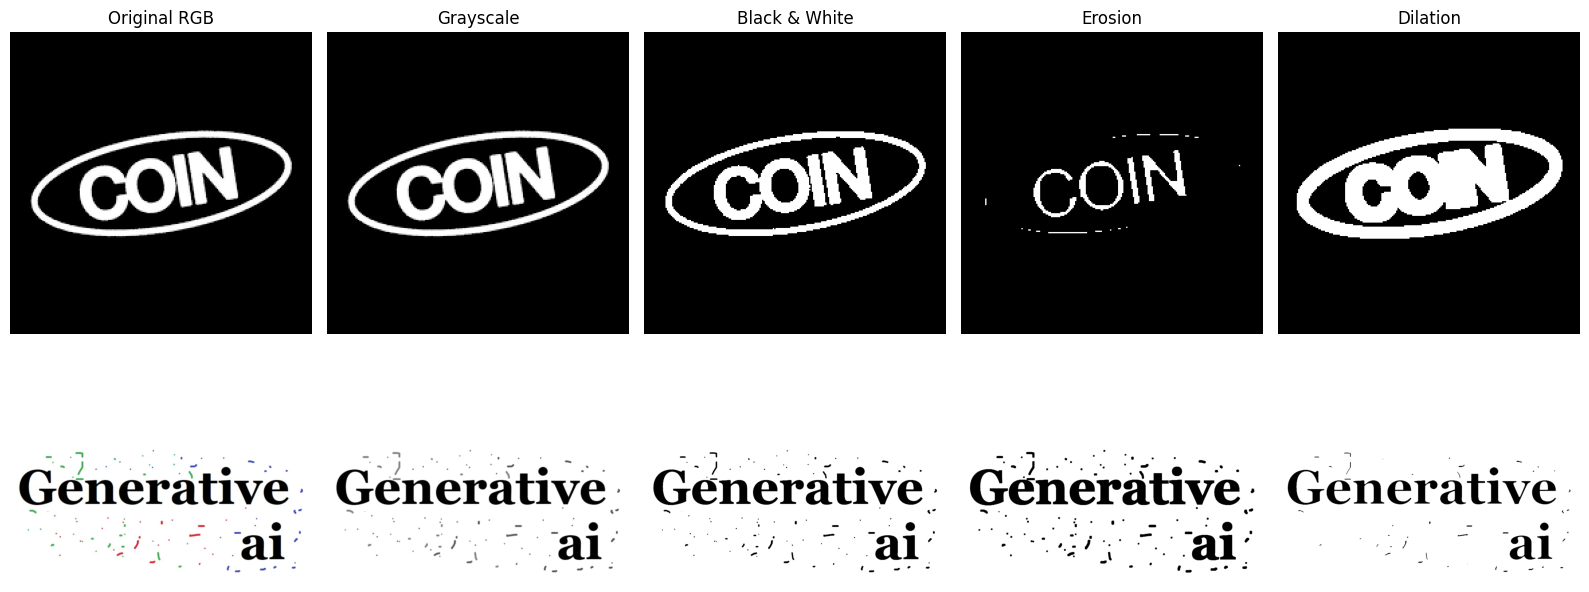

In [2]:
# Function for processing pipeline
def process_image(image, T=150, kernel_size=5):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define Square Kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Erosion
    erosion = cv2.erode(bw, kernel, iterations=1)
    
    # Dilation
    dilation = cv2.dilate(bw, kernel, iterations=1)
    
    return gray, bw, erosion, dilation

# Process both images
gray1, bw1, erosion1, dilation1 = process_image(image1)
gray2, bw2, erosion2, dilation2 = process_image(image2)

# --- Visualization ---
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Titles
titles = ["Original RGB", "Grayscale", "Black & White", "Erosion", "Dilation"]

# Image 1 visualizations
axes[0,0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0,1].imshow(gray1, cmap="gray")
axes[0,2].imshow(bw1, cmap="gray")
axes[0,3].imshow(erosion1, cmap="gray")
axes[0,4].imshow(dilation1, cmap="gray")

# Image 2 visualizations
axes[1,0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1,1].imshow(gray2, cmap="gray")
axes[1,2].imshow(bw2, cmap="gray")
axes[1,3].imshow(erosion2, cmap="gray")
axes[1,4].imshow(dilation2, cmap="gray")

# Set titles for top row
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=12)

# Remove axis
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()


## Converting Image with Color Conversion and Morphological Operation (Different Shape)

### Morphological Operations with Different Kernel Shapes  

In morphological operations, the **structuring element (kernel)** determines how erosion and dilation are applied to the image.  
Different kernel shapes affect the result in unique ways:  

---

#### 🔹 Square Kernel (`cv2.MORPH_RECT`)  
- Shape: Full \(n \times n\) block.  
- Effect: Strongest smoothing, removes small details aggressively.  
- Useful for: General noise removal and uniform erosion/dilation.  

---

##### 🔹 Elliptical Kernel (`cv2.MORPH_ELLIPSE`)  
- Shape: Circular/elliptical area within the \(n \times n\) square.  
- Effect: More natural rounding of shapes, less distortion than square.  
- Useful for: Preserving rounded objects (coins, circles, blobs).  

---

#### 🔹 Cross Kernel (`cv2.MORPH_CROSS`)  
- Shape: Cross (+) inside the \(n \times n\) square.  
- Effect: Thinner erosion/dilation, keeps diagonal connections weaker.  
- Useful for: Highlighting linear structures and skeleton-like patterns.  

---

#### 🔹 Visualization Layout  

For each input image (two rows):  
1. **Original RGB**  
2. **Grayscale**  
3. **Black & White (Thresholded)**  
4. **Erosion (Square)**  
5. **Dilation (Square)**  
6. **Erosion (Ellipse)**  
7. **Dilation (Ellipse)**  
8. **Erosion (Cross)**  

This side-by-side comparison shows how **kernel shape changes the morphological outcome**.  


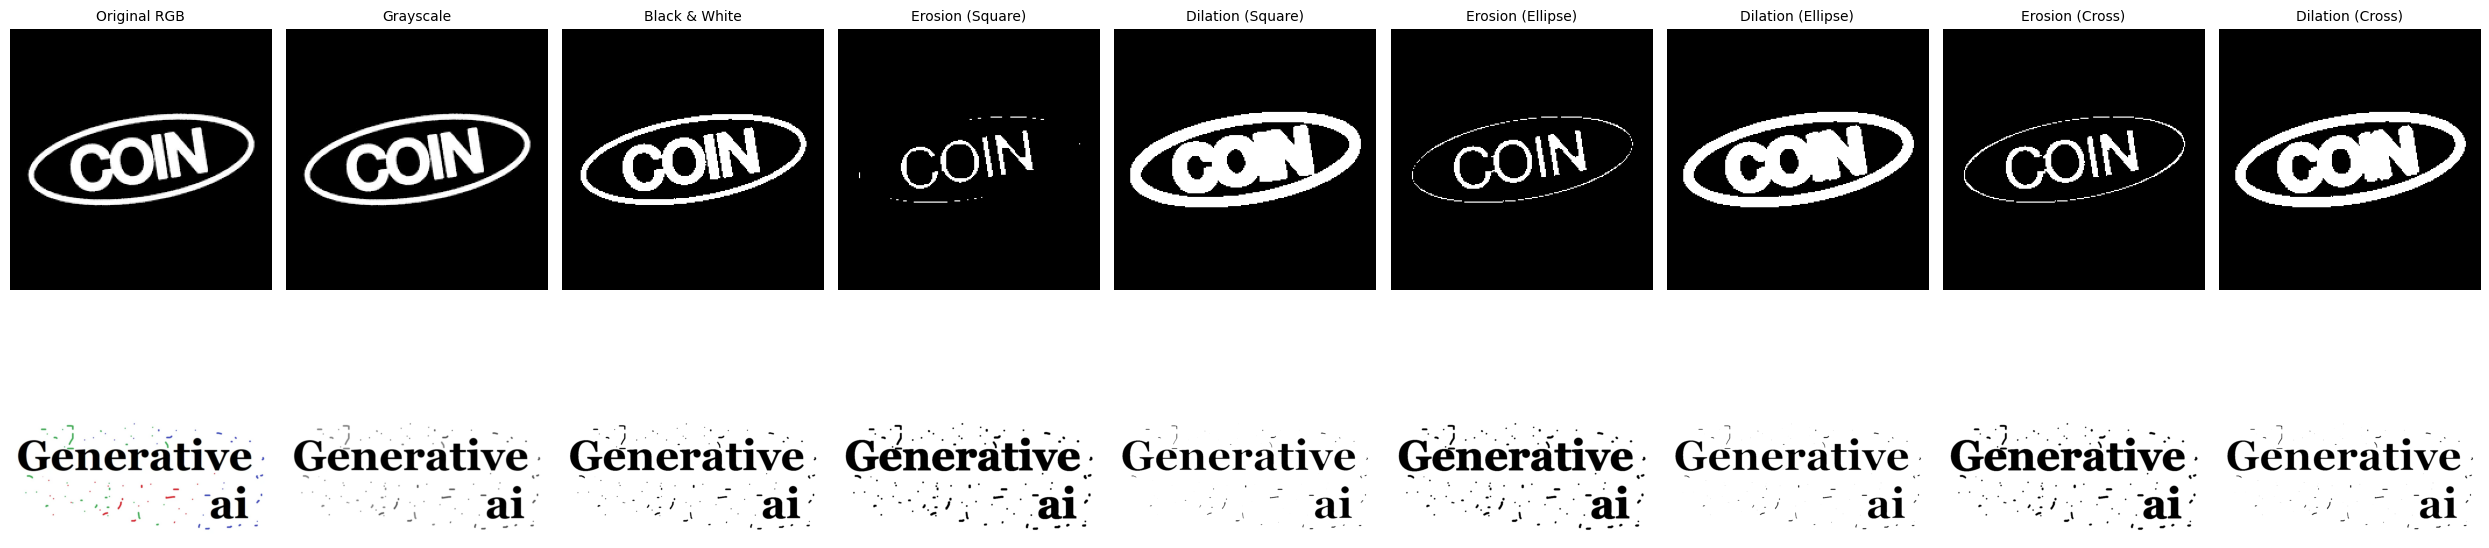

In [11]:
# Function for processing pipeline with different kernel shapes
def process_image_with_kernels(image, T=150, kernel_size=5):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define different kernels
    kernels = {
        "Square": cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size)),
        "Ellipse": cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)),
        "Cross": cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size)),
    }
    
    results = {}
    
    for kname, kernel in kernels.items():
        erosion = cv2.erode(bw, kernel, iterations=1)
        dilation = cv2.dilate(bw, kernel, iterations=1)
        results[kname] = (erosion, dilation)
    
    return gray, bw, results

# Process both images
gray1, bw1, results1 = process_image_with_kernels(image1)
gray2, bw2, results2 = process_image_with_kernels(image2)

# --- Visualization ---
fig, axes = plt.subplots(2, 9, figsize=(25, 8))

# Titles
titles = ["Original RGB", "Grayscale", "Black & White",
          "Erosion (Square)", "Dilation (Square)",
          "Erosion (Ellipse)", "Dilation (Ellipse)",
          "Erosion (Cross)", "Dilation (Cross)"]

# -------------------
# Image 1 visualizations
# -------------------
axes[0,0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0,1].imshow(gray1, cmap="gray")
axes[0,2].imshow(bw1, cmap="gray")

# Square
axes[0,3].imshow(results1["Square"][0], cmap="gray")
axes[0,4].imshow(results1["Square"][1], cmap="gray")

# Ellipse
axes[0,5].imshow(results1["Ellipse"][0], cmap="gray")
axes[0,6].imshow(results1["Ellipse"][1], cmap="gray")

# Cross
axes[0,7].imshow(results1["Cross"][0], cmap="gray")  # Erosion
axes[0,8].imshow(results1["Cross"][1], cmap="gray")  # Dilation

# -------------------
# Image 2 visualizations
# -------------------
axes[1,0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1,1].imshow(gray2, cmap="gray")
axes[1,2].imshow(bw2, cmap="gray")

# Square
axes[1,3].imshow(results2["Square"][0], cmap="gray")
axes[1,4].imshow(results2["Square"][1], cmap="gray")

# Ellipse
axes[1,5].imshow(results2["Ellipse"][0], cmap="gray")
axes[1,6].imshow(results2["Ellipse"][1], cmap="gray")

# Cross
axes[1,7].imshow(results2["Cross"][0], cmap="gray")  # Erosion
axes[1,8].imshow(results2["Cross"][1], cmap="gray")  # Dilation

# -------------------
# Set titles only for the top row
# -------------------
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=10)

# Remove axis ticks for all subplots
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()

## Change the Iteration for Dilation and Erotion
Iteration = 1 -> Iteration = 3

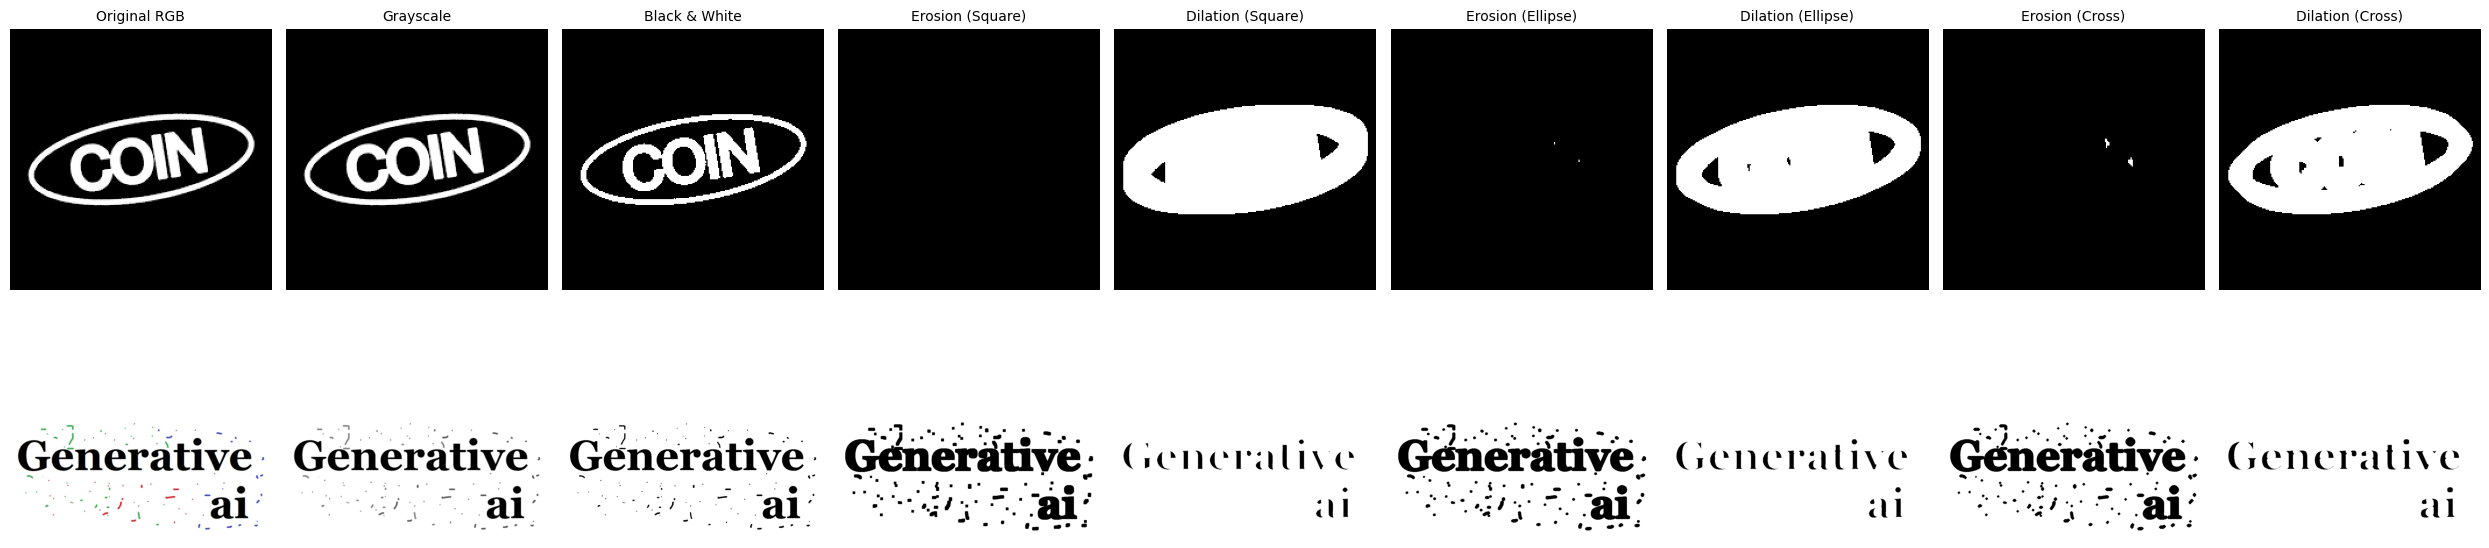

In [ ]:
# Function for processing pipeline with different kernel shapes
def process_image_with_kernels(image, T=150, kernel_size=5):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define different kernels
    kernels = {
        "Square": cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size)),
        "Ellipse": cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size)),
        "Cross": cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size)),
    }
    
    results = {}
    
    for kname, kernel in kernels.items():
        erosion = cv2.erode(bw, kernel, iterations=3)
        dilation = cv2.dilate(bw, kernel, iterations=4)
        results[kname] = (erosion, dilation)
    
    return gray, bw, results

# Process both images
gray1, bw1, results1 = process_image_with_kernels(image1)
gray2, bw2, results2 = process_image_with_kernels(image2)

# --- Visualization ---
fig, axes = plt.subplots(2, 9, figsize=(25, 8))

# Titles
titles = ["Original RGB", "Grayscale", "Black & White",
          "Erosion (Square)", "Dilation (Square)",
          "Erosion (Ellipse)", "Dilation (Ellipse)",
          "Erosion (Cross)", "Dilation (Cross)"]

# -------------------
# Image 1 visualizations
# -------------------
axes[0,0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0,1].imshow(gray1, cmap="gray")
axes[0,2].imshow(bw1, cmap="gray")

# Square
axes[0,3].imshow(results1["Square"][0], cmap="gray")
axes[0,4].imshow(results1["Square"][1], cmap="gray")

# Ellipse
axes[0,5].imshow(results1["Ellipse"][0], cmap="gray")
axes[0,6].imshow(results1["Ellipse"][1], cmap="gray")

# Cross
axes[0,7].imshow(results1["Cross"][0], cmap="gray")  # Erosion
axes[0,8].imshow(results1["Cross"][1], cmap="gray")  # Dilation

# -------------------
# Image 2 visualizations
# -------------------
axes[1,0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1,1].imshow(gray2, cmap="gray")
axes[1,2].imshow(bw2, cmap="gray")

# Square
axes[1,3].imshow(results2["Square"][0], cmap="gray")
axes[1,4].imshow(results2["Square"][1], cmap="gray")

# Ellipse
axes[1,5].imshow(results2["Ellipse"][0], cmap="gray")
axes[1,6].imshow(results2["Ellipse"][1], cmap="gray")

# Cross
axes[1,7].imshow(results2["Cross"][0], cmap="gray")
axes[1,8].imshow(results2["Cross"][1], cmap="gray")

# -------------------
# Set titles only for the top row
# -------------------
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=10)

# Remove axis ticks for all subplots
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()

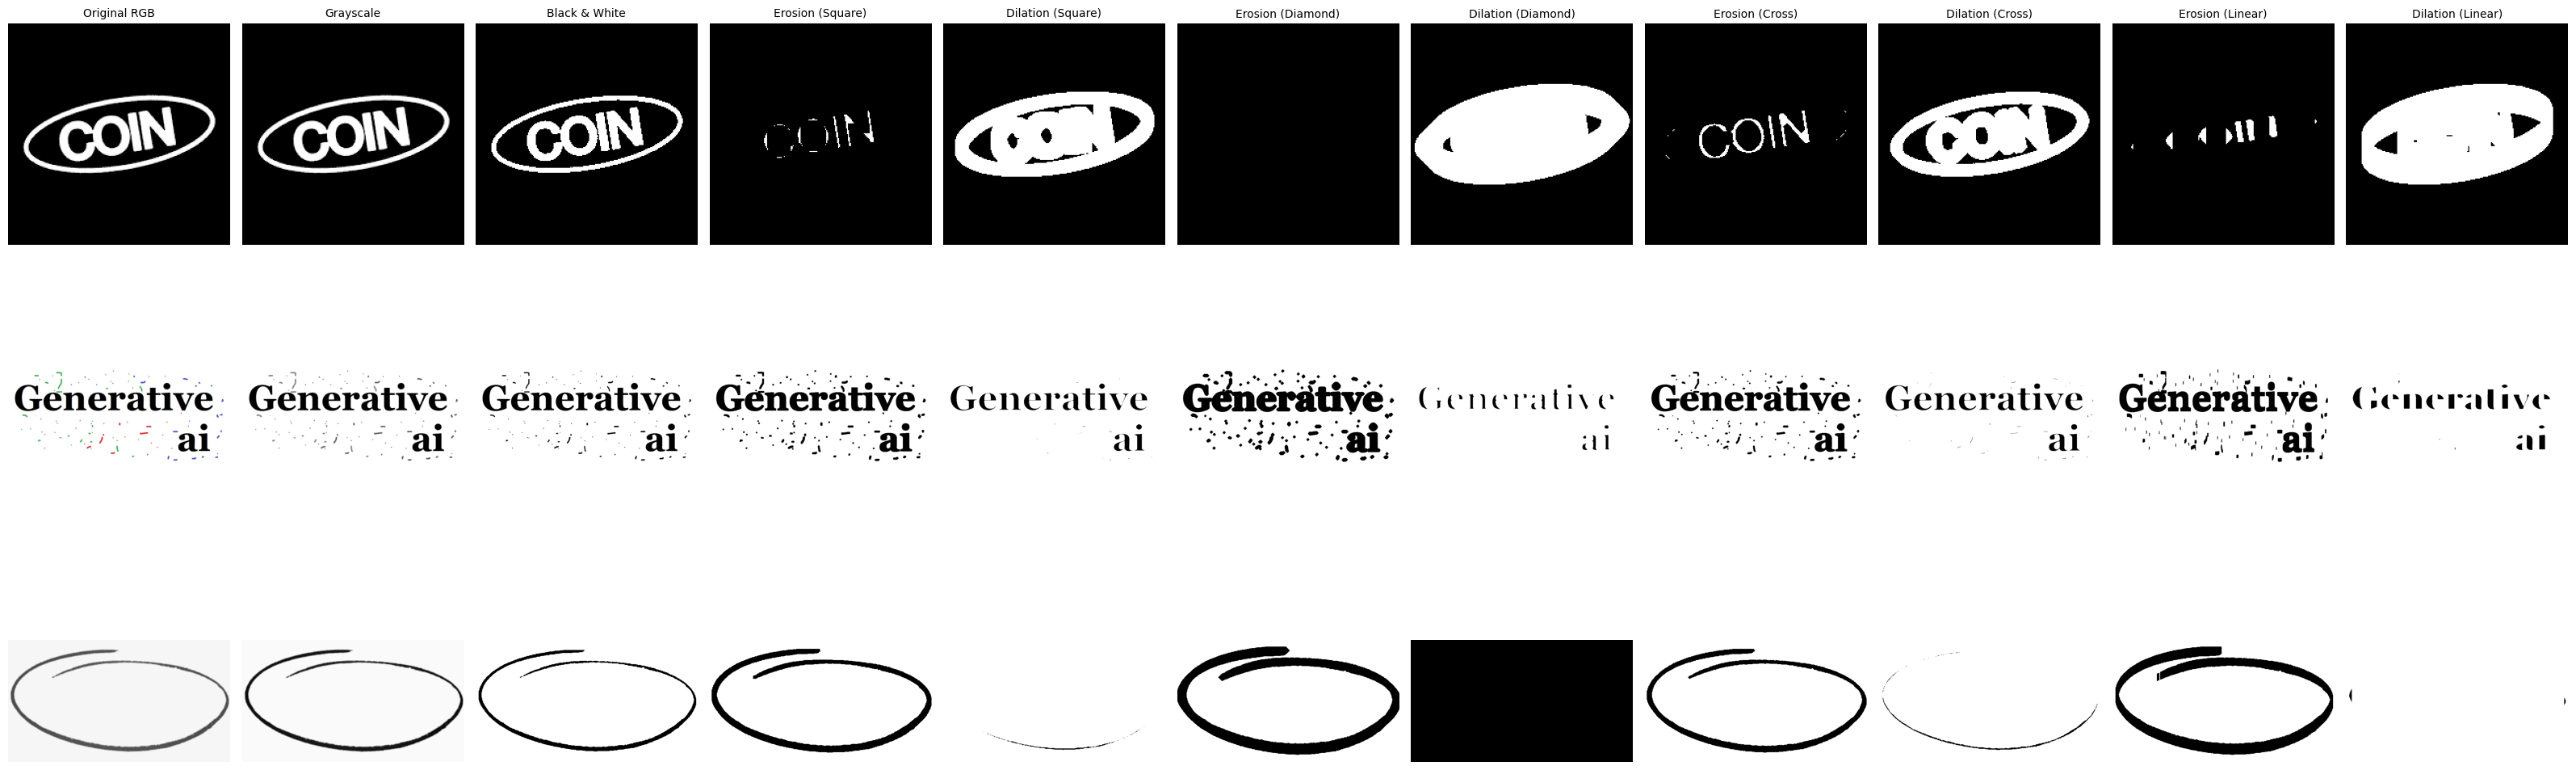

In [27]:
def process_image_with_kernels(image, T=150):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define manual kernels
    kernels = {
        "Cross": np.array([[0,1,0],
                           [1,1,1],
                           [0,1,0]], dtype=np.uint8),

        "Square": np.array([[1,1,1],
                            [1,1,1],
                            [1,1,1]], dtype=np.uint8),

        "Linear": np.array([[1],
                            [1],
                            [1],
                            [1],
                            [1],
                            [1],
                            [1]], dtype=np.uint8),

        "Diamond": np.array([[0,0,0,1,0,0,0],
                             [0,0,1,1,1,0,0],
                             [0,1,1,1,1,1,0],
                             [1,1,1,1,1,1,1],
                             [0,1,1,1,1,1,0],
                             [0,0,1,1,1,0,0],
                             [0,0,0,1,0,0,0]], dtype=np.uint8),
    }
    
    results = {}
    
    for kname, kernel in kernels.items():
        erosion = cv2.erode(bw, kernel, iterations=3)   # erosion with 3
        dilation = cv2.dilate(bw, kernel, iterations=4) # dilation with 4
        results[kname] = (erosion, dilation)
    
    return gray, bw, results


# --- Process all three images ---
gray1, bw1, results1 = process_image_with_kernels(image1)
gray2, bw2, results2 = process_image_with_kernels(image2)
gray3, bw3, results3 = process_image_with_kernels(image3)

# --- Visualization ---
fig, axes = plt.subplots(3, 11, figsize=(32, 12))

# Titles for top row
titles = [
    "Original RGB", "Grayscale", "Black & White",
    "Erosion (Square)", "Dilation (Square)",
    "Erosion (Diamond)", "Dilation (Diamond)",
    "Erosion (Cross)", "Dilation (Cross)",
    "Erosion (Linear)", "Dilation (Linear)"
]

# Function to plot results for one row
def plot_row(ax_row, image, gray, bw, results):
    ax_row[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax_row[1].imshow(gray, cmap="gray")
    ax_row[2].imshow(bw, cmap="gray")

    # Square
    ax_row[3].imshow(results["Square"][0], cmap="gray")
    ax_row[4].imshow(results["Square"][1], cmap="gray")

    # Diamond
    ax_row[5].imshow(results["Diamond"][0], cmap="gray")
    ax_row[6].imshow(results["Diamond"][1], cmap="gray")

    # Cross
    ax_row[7].imshow(results["Cross"][0], cmap="gray")
    ax_row[8].imshow(results["Cross"][1], cmap="gray")

    # Linear
    ax_row[9].imshow(results["Linear"][0], cmap="gray")
    ax_row[10].imshow(results["Linear"][1], cmap="gray")


# Plot rows
plot_row(axes[0], image1, gray1, bw1, results1)
plot_row(axes[1], image2, gray2, bw2, results2)
plot_row(axes[2], image3, gray3, bw3, results3)

# Set titles only for the top row
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=10)

# Remove axis ticks for all subplots
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()
